**Credit Card Fraud Detection**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(15936, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15935 entries, 0 to 15934
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15935 non-null  int64  
 1   V1      15935 non-null  float64
 2   V2      15935 non-null  float64
 3   V3      15935 non-null  float64
 4   V4      15935 non-null  float64
 5   V5      15935 non-null  float64
 6   V6      15935 non-null  float64
 7   V7      15935 non-null  float64
 8   V8      15935 non-null  float64
 9   V9      15935 non-null  float64
 10  V10     15935 non-null  float64
 11  V11     15935 non-null  float64
 12  V12     15935 non-null  float64
 13  V13     15935 non-null  float64
 14  V14     15935 non-null  float64
 15  V15     15935 non-null  float64
 16  V16     15935 non-null  float64
 17  V17     15935 non-null  float64
 18  V18     15935 non-null  float64
 19  V19     15935 non-null  float64
 20  V20     15935 non-null  float64
 21  V21     15935 non-null  float64
 22  V22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,...,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12120.260872,-0.254396,0.277226,0.803938,0.301421,-0.130464,0.112588,-0.150437,0.000702,0.860951,...,-0.061742,-0.162201,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8981.753206,1.843095,1.491528,1.704271,1.491727,1.382528,1.329439,1.321939,1.303549,1.253948,...,0.855550,0.624594,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.000000,-0.970838,-0.286415,0.371882,-0.620946,-0.712555,-0.639044,-0.600860,-0.179140,0.067268,...,-0.268833,-0.559224,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318487,0.247479,0.941842,0.231458,-0.186223,-0.160707,-0.084684,0.017475,0.851983,...,-0.127131,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20617.000000,1.161927,0.884715,1.576016,1.180129,0.352261,0.501990,0.440019,0.266221,1.567852,...,0.027246,0.229756,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27370.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


# Handling Null Values

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data = data.dropna()

In [ ]:
data.Class.value_counts()

,count
Class,
0.0,15862
1.0,73


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])


In [ ]:
x = data.drop(['Class'], axis=1)
y = data['Class']


# Synthetic minority oversampling technique

this technique is used when dataset is imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)


# Model Training - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for Precision-Recall Curve


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("AUPRC:", pr_auc)


Accuracy: 0.9932758982979617
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4805
         1.0       0.99      1.00      0.99      4713

    accuracy                           0.99      9518
   macro avg       0.99      0.99      0.99      9518
weighted avg       0.99      0.99      0.99      9518

AUPRC: 0.998314008108663


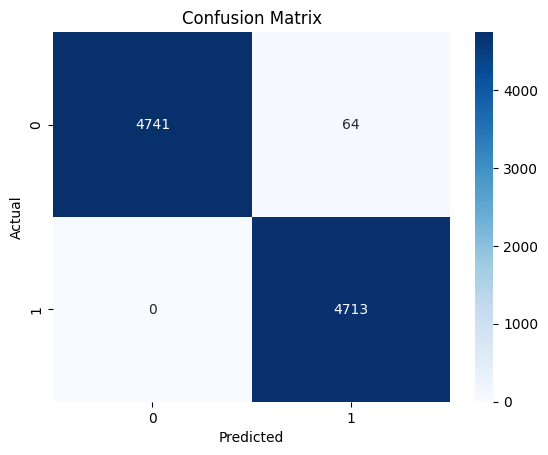

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Training - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = model.predict(X_test)
y_prob1 = model.predict_proba(X_test)[:, 1]  # Probabilities for Precision-Recall Curve


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.9998949359109056
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4805
         1.0       1.00      1.00      1.00      4713

    accuracy                           1.00      9518
   macro avg       1.00      1.00      1.00      9518
weighted avg       1.00      1.00      1.00      9518

